# Stein's Asteroid

### Introduction

This project is part of the AST221 course at the University of Toronto.

In the file "AppendixA3.txt" are measurements of the apparent magnitude of asteroid Stein's, a target for the Rosetta mission. The observations were taken with the OSIRIS scientific camera that was part of the Rosetta spacecraft. 

Most famously, Rosetta orbited Comet 67P/Churyumov-Gerasimenko, and sent a lander, Philae, to the surface. Before that, it did a flyby of asteroid Stein's. Stein's is in the main asteroid belt. More detailed information on the Rosetta mission can be accessed [here](esa.int/Science_Exploration/Space_Science/Rosetta). 

The data on asteroid Stein's were published in the journal article "Determination of the light curve of the Rosetta target asteroid (2867) Steins by the OSIRIS cameras onboard Rosetta" by Kuppers et al. (2007). This paper can be accessed through this [link](https://www.aanda.org/articles/aa/full/2007/04/aa6694-06/aa6694-06.html). 

The file contains two columns: date in Modified Julian Date (MJD), and apparent magnitude at a wavelength of 600 nm. A definition of MJD can be found [here](https://scienceworld.wolfram.com/astronomy/ModifiedJulianDate.html). Our goal here is to use the data to estimate the rotational period of the asteroid, its brightness, and hence its size.

### Code

In [1]:
# Import needed libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [2]:
# Read in the data from AppendixA3 and separate all the columns into different arrays

date, mag = np.loadtxt('AppendixA3.txt', skiprows = 1, usecols = (0, 1), unpack = True)

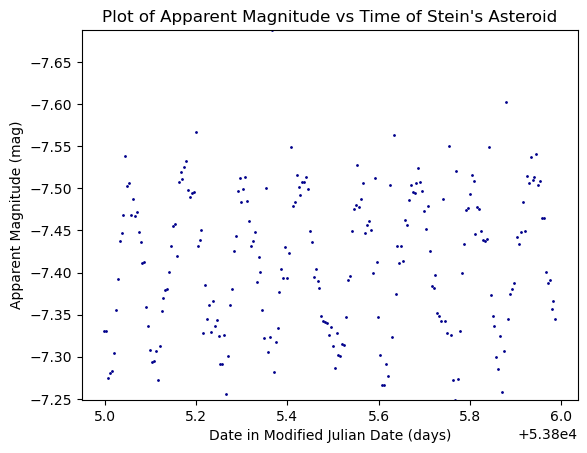

In [3]:
# Plot the apparent magnitude of the astroid against time

fig = plt.figure()

plt.scatter(date, mag, color = 'darkblue', s = 1)

plt.title("Plot of Apparent Magnitude vs Time of Stein's Asteroid")
plt.xlabel("Date in Modified Julian Date (days)")
plt.ylabel("Apparent Magnitude (mag)")

plt.ylim(max(mag), min(mag))

plt.show()

One way to look for periodicity in a data set is to 'fold' the data around an initial estimate of the period, such that the date and time measurement is converted to some fraction of the orbital period - this is called the phase. As an example, if we have measurements on days 1, 2, 3, and 4, and the orbital period is 3, then the phase of the measurements would be 1/3, 2/3, 3/3, and 4/3. The observations on days 1 and 4 therefore track the same part of the asteroid's rotation, and we can combine these data points to obtain a better measure of the light curve over the asteroid's rotational period. If we get the period just right, the light curves over the entire set of observations should line up nicely to provide a single light curve with clear features. For asteroid Stein's, each rotation has two bright peaks and two dips in the light curve.

To calculate the phase, we use the modulo operator in python, `%`. The modulo operation returns the remainder of a division, after one number is divided by another. A calculation using the modulo operation with the observation dates and the proposed period produces the remainder. Dividing the remainder by the proposed period then gives the fraction of the period for that particular observation date. This allows us to stack the data and hopefully see a more clear trend. In the example above, `1 % 3` = 1, and then 1/3 is then the phase. 

Plot the resulting magnitude vs. rotational phase, and iterate until a clear pattern emerges.

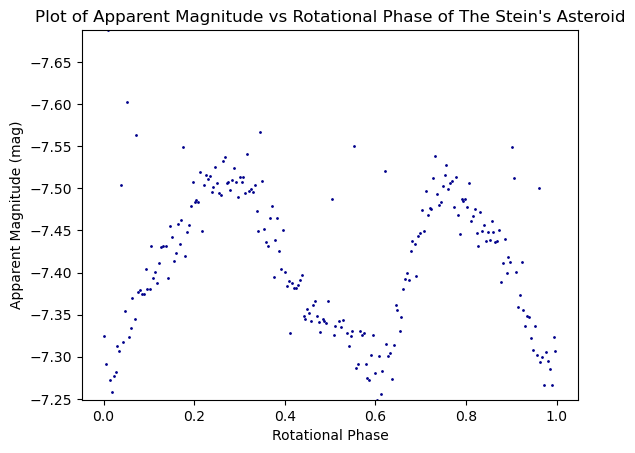

In [6]:
# Estimate the period

period = 0.251

# The unit of the period is in days. From the plot, we can see that in 1 day (from x = 5.0 to x = 6.0), 
# there are five rotations. So, one period is roughly one day divided by five. This gives us the starting value.
# After some refinements (trying different values for the period), I found that the reasonable value 
# ranges from 0.246 days to 0.256 days. Thus, the average value is the middle point, which is 0.251 days with
# an uncertainty of 0.005 days

# Using the modulo operator to obtain the remainder of the date/period
# The remainder/period then gives the fraction of the period for each measurement, which is the phase

remainder = date % period
phase = remainder / period

# Plot the result (magnitude vs phase). The range on the x-axis should be from 0 to 1.
# Iterate through periods above and check the plot below to find the best estimate of the period. 

fig = plt.figure()

plt.scatter(phase, mag, color = 'darkblue', s = 1)

plt.title("Plot of Apparent Magnitude vs Rotational Phase of The Stein's Asteroid")
plt.xlabel('Rotational Phase')
plt.ylabel('Apparent Magnitude (mag)')

plt.ylim(max(mag), min(mag))

plt.savefig('Period-Folded Plot of Steins.png')

Next, calculate the mean magnitude of asteroid Stein's, and estimate the amplitude of the variation from the mean. To do this, select a small range near the maximum and minimum magnitude values, and calculate the mean and standard deviation of those points only. The standard deviation gives us a measure of how certain we are in the mean measurement. 

Use `np.where()` to select the indices of the data points we are interested in, i.e.

`high_indices = np.where(mag > 7.4)`. 

Use those indices to select and use those datapoints in the mean, i.e. 

`mean_peak = np.mean(mag[high_indices])`. 

In [7]:
# Calculate and print the mean magnitude from the list of magnitudes using np.mean():

mean_mag = round(mag.mean(), 4)

# Identify a range in maximum values and calculate the mean and standard deviation

high_indices = np.where(mag < - 7.5)
high_mag = mag[high_indices]
mean_high_mag = round(np.mean(high_mag), 4)
std_high_mag = round(np.std(high_mag), 4)

# Identify a range in minimum values and calculate the mean and standard deviation

low_indices = np.where(mag > - 7.3)
low_mag = mag[low_indices]
mean_low_mag = round(np.mean(low_mag), 4)
std_low_mag = round(np.std(low_mag), 4)

# Calculate the amplitude of the rotation curve, and estimate the uncertainty:
# The difference between the mean of the maximum values and the mean magnitude of all observations will be our upper_amplitude.
# The difference between the mean of the minimum values and the mean magnitude of all observations will be our lower_amplitude.
# Amplitude can be considered as the average value between the upper_amplitude and the lower_amplitude

upper_amplitude = abs(mean_high_mag - mean_mag)    
lower_amplitude = abs(mean_low_mag - mean_mag)
amplitude = round(((upper_amplitude + lower_amplitude)/2), 4)    

# The uncertainty in amplitude can be considered as the difference between the upper or lower amplitude (choose one, 
# they will yield the same result) and the amplitude.

uncertainty = round(abs(upper_amplitude - amplitude), 4)

# Print all the values

print(f"The mean magnitude from all observations is {mean_mag}. \nThe mean magnitude and the standard deviation \
from all high indices observations are {mean_high_mag} and {std_high_mag}. \nThe mean magnitude and the \
standard deviation from all low indices observations are {mean_low_mag} and {std_low_mag}. \nThe amplitude of \
the observation is {amplitude} \nThe uncertainty in amplitude is {uncertainty}.")

The mean magnitude from all observations is -7.4141. 
The mean magnitude and the standard deviation from all high indices observations are -7.5253 and 0.033. 
The mean magnitude and the standard deviation from all low indices observations are -7.2774 and 0.013. 
The amplitude of the observation is 0.1239 
The uncertainty in amplitude is 0.0127.


### Calculation of Stein's Radius

First we compare the apparent magnitude of Stein's and apparent magnitude of the Sun.

\begin{equation}
m_s - m_{\odot} = -2.5 \times \log{\frac{F_s}{F_{\odot}}}
\end{equation}

We also know that $F = \frac{L}{4\pi R^2}$. For Stein's, its luminosity is equal to to the flux absorbed by Stein's from the Sun multiplied by the cross section area, i.e.

\begin{align*}
L_s = (1 - A) \times \frac{L_{\odot}}{4\pi a^2} \times \pi R_s^2
\end{align*}

where $A$ is the albedo, $a$ is the distance from the Sun to Stein's, $L_{\odot}$ is the solar luminosity, and $R_s$ is the radius of Stein's. Plugging in this value, we get:

\begin{equation}
m_s - m_{\odot} = -2.5 \times \log{\frac{(1 - A) \times R_s^2 \times d_{\odot}^2}{4 a^2 d_s^2}}
\end{equation}

where $d_{\odot}$ is the distance from Earth to the Sun and $d_s$ is the distance from Earth to Stein's.

The apparent magnitude of the Sun is $m_{\odot} = -26.75$. We also know that the apparent magnitude of Stein's when it is the closest to the Earth is $m_s = 15.5$ with albedo of $A = 0.3$. We know that the distance of Stein's from the Sun is $a = 2$ AU or $a = 2.9 \times 10^{11}$ m. We also know that Earth-Sun distance is $d_{\odot} = 1$ AU or $d_{\odot} = 1.496 \times 10^{11}$ m. Therefore, we can conclude that the Earth-Stein's distance is also $d_{s} = 1$ AU or $d_{s} = 1.496 \times 10^{11}$ m. Plugging in all these values and solve for $R_s$, we get $R_s \approx 2.5$ km.

### Conclusion

From the graph, we found that Stein's asteroid has a rotational period of 0.25 days, mean magnitude of -7.4, and amplitude of 0.13 with uncertainty of 0.01. Then, from the calculation, we determined the radius of the Stein's asteroid to be around 2.5 km.

### References

The data 'AppendixA3.dat' is obtained from and part of AST221.